In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import requests
import matplotlib.pyplot as plt

In [4]:
#load data
mpd = pd.read_csv("dc-crimes-search-results.csv")
mpd.head()

,XBLOCK,BLOCK,LATITUDE,CENSUS_TRACT,CCN,METHOD,LONGITUDE,location,BLOCK_GROUP,START_DATE,...,END_DATE,VOTING_PRECINCT,BID,WARD,SHIFT,REPORT_DAT,offense-text,NEIGHBORHOOD_CLUSTER,DISTRICT,sector
0,399695.42,800 - 899 block of 2nd street se,38.879963,7203.0,24045697,others,-77.003510,"38.879963057,-77.003510271",007203 3,"3/26/2024, 6:50:00 PM",...,"3/26/2024, 6:55:00 PM",precinct 131,capitol riverfront,8.0,evening,"3/26/2024, 8:07:18 PM",robbery,cluster 27,1.0,1D3
1,397162.13,3523 - 3599 block of 14th street nw,38.935928,2900.0,24167419,gun,-77.032732,"38.9359278257,-77.0327319989",002900 2,"10/28/2024, 10:24:00 AM",...,"10/28/2024, 12:30:00 PM",precinct 41,NaN,1.0,day,"10/28/2024, 1:59:26 PM",robbery,cluster 2,4.0,4D3
2,400594.86,900 - 999 block of rhode island avenue ne,38.922217,9102.0,24058722,gun,-76.993140,"38.9222166046,-76.9931402028",009102 4,"4/19/2024, 4:30:00 PM",...,"4/19/2024, 4:40:00 PM",precinct 72,NaN,5.0,evening,"4/19/2024, 6:33:47 PM",robbery,cluster 22,5.0,5D2
3,405167.05,4300 - 4338 block of h street se,38.878662,7707.0,24031392,others,-76.940451,"38.8786618902,-76.9404510596",007707 1,"2/29/2024, 2:05:00 PM",...,"2/29/2024, 2:43:00 PM",precinct 106,NaN,7.0,day,"2/29/2024, 2:43:25 PM",theft f/auto,cluster 33,6.0,6D2
4,393839.71,2200 - 2298 block of wisconsin avenue nw,38.919667,300.0,24174387,others,-77.071037,"38.9196665779,-77.0710366027",000300 1,"11/9/2024, 3:32:00 PM",...,"11/9/2024, 4:01:00 PM",precinct 11,NaN,3.0,evening,"11/9/2024, 4:55:10 PM",theft/other,cluster 14,2.0,2D2


In [5]:
offense_counts = mpd['offense-text'].value_counts()

In [6]:
#convert the counts to percentages
offense_percentage = offense_counts / offense_counts.sum() * 100

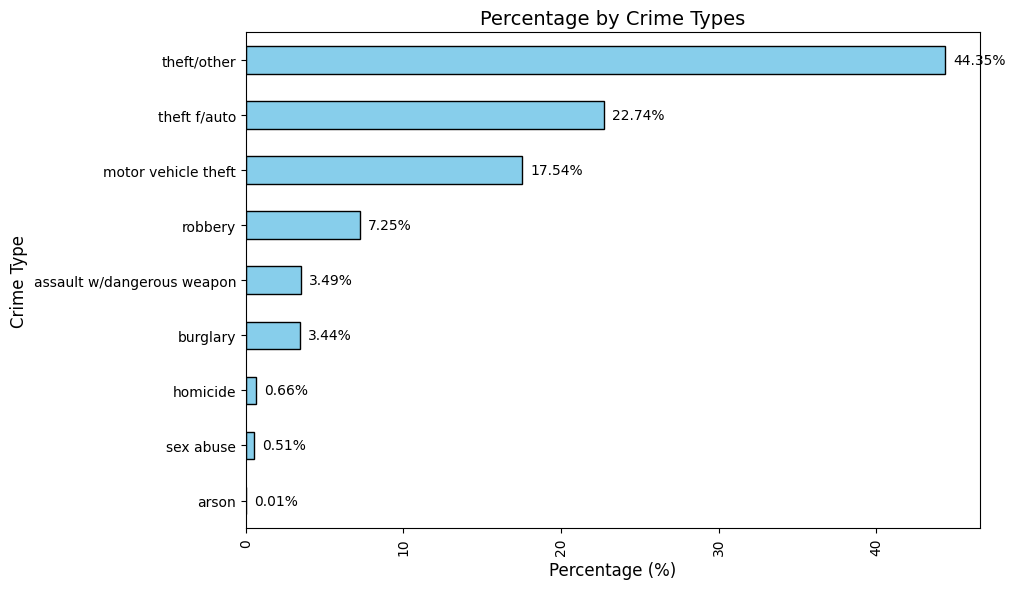

In [11]:
# Plot
plt.figure(figsize=(10, 6))
bars = offense_percentage.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Percentage by Crime Types', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.gca().invert_yaxis()  # To display the highest percentage at the top
# Add percentage values to the bars
for index, value in enumerate(offense_percentage):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10, color='black')

# Save the plot
plt.savefig('crime_types_percentage.jpg', format='jpeg', dpi=300)

plt.show()


In [8]:
#SW = 1
#NW = 2, 3, 4
#NE = 5
#SE  = 6, 7

#mutate column that is "locality" based on if BLOCK contains se, sw, ne, nw
def assign_locality(address):
    address = address.lower()  # Make address lowercase to handle case-insensitivity
    
    # Check for each locality keyword and return the corresponding value
    if 'ne' in address:
        return 'NE'
    elif 'nw' in address:
        return 'NW'
    elif 'se' in address:
        return 'SE'
    elif 'sw' in address:
        return 'SW'
    else:
        return 'Unknown'  # In case no locality is found

#  Apply the function to the 'BLOCK' column to create a new 'locality' column
mpd['locality'] = mpd['BLOCK'].apply(assign_locality)

# Save the updated DataFrame to CSV
mpd.to_csv('updated_file.csv', index=False)

# Check if the new column 'locality' is present
print(mpd.head())








      XBLOCK                                      BLOCK   LATITUDE  \
0  399695.42           800 - 899 block of 2nd street se  38.879963   
1  397162.13        3523 - 3599 block of 14th street nw  38.935928   
2  400594.86  900 - 999 block of rhode island avenue ne  38.922217   
3  405167.05           4300 - 4338 block of h street se  38.878662   
4  393839.71   2200 - 2298 block of wisconsin avenue nw  38.919667   

   CENSUS_TRACT       CCN  METHOD  LONGITUDE                      location  \
0        7203.0  24045697  others -77.003510    38.879963057,-77.003510271   
1        2900.0  24167419     gun -77.032732  38.9359278257,-77.0327319989   
2        9102.0  24058722     gun -76.993140  38.9222166046,-76.9931402028   
3        7707.0  24031392  others -76.940451  38.8786618902,-76.9404510596   
4         300.0  24174387  others -77.071037  38.9196665779,-77.0710366027   

  BLOCK_GROUP               START_DATE  ... VOTING_PRECINCT  \
0    007203 3    3/26/2024, 6:50:00 PM  ...    

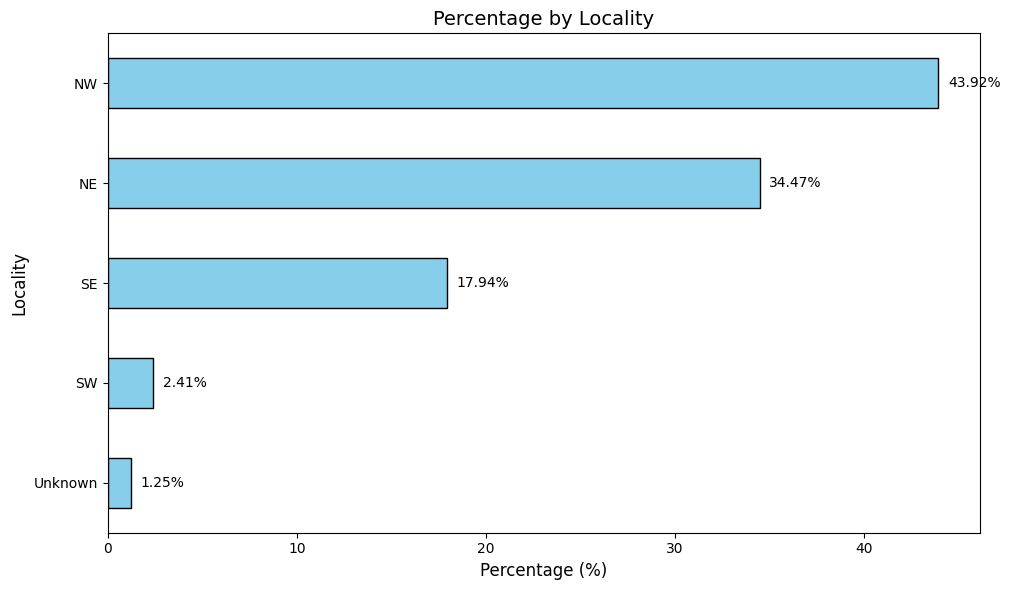

In [13]:
#plot by locality
local_counts = mpd['locality'].value_counts()

#convert the counts to percentages
local_percentage = local_counts / local_counts.sum() * 100

# Plot
plt.figure(figsize=(10, 6))

# Plot the bar chart for local_percentage
bars = local_percentage.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the chart with titles and labels
plt.title('Percentage by Locality', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Locality', fontsize=12)
plt.tight_layout()  # Adjust layout for better readability
plt.gca().invert_yaxis()  # To display the highest percentage at the top


# Add percentage values to the bars
for index, value in enumerate(local_percentage):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10, color='black')

# Save the plot as a JPEG file
plt.savefig('locality_percentage.jpg', format='jpeg', dpi=300)

# Show the plot
plt.show()